In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from pprint import pprint
import random
import matplotlib.pyplot as plt  

In [2]:
# using Eucledian distance
def Knn_classifier(train,row,validate, k):
    #store {euclid sum , label} 
    my_dist = []

    #     mydict = {}
    l = len(row)
    
    count = 0
    for r in train[:,:-1]:
        sum = 0
        for x in range(l):
            sum+=pow(row[x] - r[x],2)
            label = train [count][4]
        count+=1
        sum = math.sqrt(sum)
        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])
    
    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]
        
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k


In [3]:
def find_correct(myans , myvalidate):
    
    a = myvalidate[:][-1]
    if (myans == a):
        global correct
        correct +=1
    return correct

In [4]:
df = pd.read_csv('Iris.csv')
df.columns=['a','b','c','d','label']
df.head()

,a,b,c,d,label
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.0,3.0,1.6,0.2,Iris-setosa
2,6.2,2.8,4.8,1.8,Iris-virginica
3,6.4,3.1,5.5,1.8,Iris-virginica
4,4.9,2.5,4.5,1.7,Iris-virginica


In [5]:

# train,validate = train_test_split(df, test_size = 1)
train,validate = train_test_split(df, test_size = 0.2)
random.seed(0)

train1=train
val1=validate


train = train.values
# print(train)
myvalidate = validate.values
validate_arr = validate.iloc[:, :-1].astype(float)
validate_arr = validate_arr.values

acc_list = []

correct = 0
for i in range(1,50) :
    for row in range(len(validate_arr)):
        myans = Knn_classifier(train,validate_arr[row],validate,i)
        corr = find_correct(myans , myvalidate[row]) 
    accu = (corr/float(len(validate_arr)))*100
    acc_list.append(accu)
    correct = 0

#     print("no of test samples", len(validate_arr))
#     print("correct",corr)
#     print("accuracy",accu)

Text(0, 0.5, 'Accuracy')

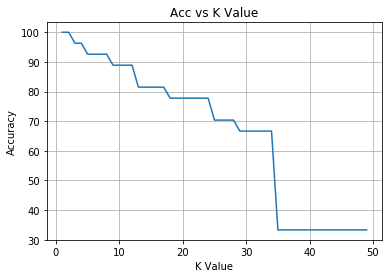

In [6]:
# plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), acc_list)
plt.title('Acc vs K Value')  
plt.xlabel('K Value')
plt.grid(True)
plt.ylabel('Accuracy') 
        

In [7]:
y_train = train1.pop('label')
x_train = train1
y_test = val1.pop('label')
x_test = val1

In [8]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=50)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))







[[9 0 0]
 [0 9 0]
 [0 2 7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.78      0.88         9

      micro avg       0.93      0.93      0.93        27
      macro avg       0.94      0.93      0.92        27
   weighted avg       0.94      0.93      0.93        27

0.925925925926
